# Créer des fonctions

Les fonctions permettent de réutiliser fréquemment des bouts de code sur des paramètres différents plutôt que de systématiquement copier-coller les mêmes opérations dans notre script.

Écrivons une première fonction qui permet de convertir des degrés Farenheit en degrés Kelvin.

In [1]:
def fahr_to_kelvin(temp):
    temp_kelvin = ((temp - 32) * 5/9) + 273.15
    return temp_kelvin

Décortiquons chaque partie de la définition de notre fonction:
![](python-function.svg)

On peut appeler notre fonction avec différents arguments comme suit:

In [3]:
fahr_to_kelvin(22)
fahr_to_kelvin(100)

310.92777777777775

# Composer une fonction à partir d'autre fonction

Une fonction peut en appeler une autre. Donc par exemple, pour créer une fonction convertissant des degrés Farenheit en degrés Celsius, on pourrait dans un premier temps écrire une fonction convertissant des degrés Kelvin en degrés Celsius. (`kelvin - 273.15`).

In [4]:
def fahr_to_celsius(temp):
    temp_kelvin = fahr_to_kelvin(temp)
    return temp_kelvin - 273.15

In [5]:
fahr_to_celsius(350)

176.66666666666663

# Utiliser des fonctions écrites par les autres

Dans une grande majorité de situations, vous serez appeler à utiliser des fonctions écrites par les autres ou récupérés sur [StackOverflow](https://www.stackoverflow.com/) par exemple.

Nous avons deux fonctions déjà écrites pour analyser et détecter des problèmes avec nos fichiers de patients.

In [15]:
# Cette fonction provient de l'atelier software carpentry
# La variable filename devrait être un nom de fichier csv
# 
def analyze(filename='inflammation-01.csv'):
    """Cette fonction produit 3 graphiques et prend
    en argument un nom de fichier csv.
    
    filename: chaîne de caractère
    
    Cette fonction ne retourne rien.
    
    Vous aurez besoin de numpy et matplotlib
    """
    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

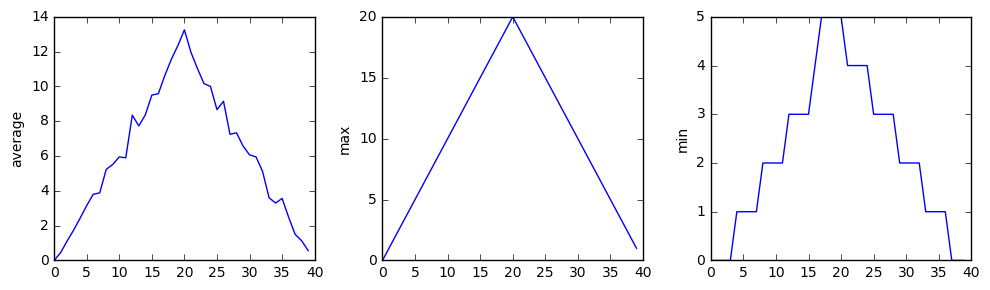

In [16]:
analyze()

In [2]:
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

Est-ce qu'on peut utiliser directement ces fonctions? 

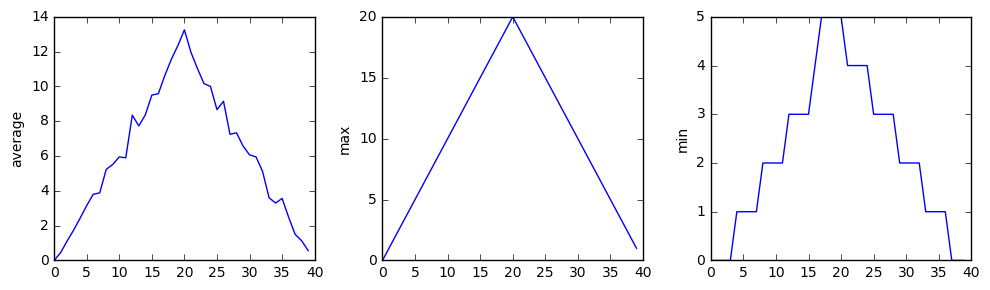

In [10]:
import numpy
import matplotlib
import matplotlib.pyplot
analyze('inflammation-01.csv')

Créez une liste de nom de fichiers et lancer une analyse suivie d'une détection de problème à l'aide d'une boucle for.

# Tester et documenter

Définissons une fonction permettant de centrer les valeurs d'un tableau autour d'une valeur fournie en paramètres.

Cette fonction peut être appellée sur notre tableau de données patient ou encore sur une tableau de zéros.

Commençons par un tableau contenant seulement des zéros.

On peut valider que notre fonction fait la bonne chose en calculant les statistiques (min, max, mean) avant et après l'appel de la fonction.

On peut toujours expliquer la logique de notre code en ajoutant des commentaires. Un commentaire débute par un dièse (`#`). Tout ce qui se suit ce caractère ne sera pas interprété par Python.

Pour fournir une documentation lisible à partir de la fonction `help`, il faut définir ce qu'on appelle une documentation de fonction (*docstring*). Pour ce faire, on utilise les triple guillemets `"""` .

# Définir des arguments par défaut

Pour l'instant, nous avons du systématiquement spécifier la valeur pour chaque argument de nos fonctions. On peut définir des valeurs par défaut pour certains arguments.